# Starter API Access Tunnel
---

## Imports

In [4]:
# Dependencies
import datetime as dt
import requests
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt



In [5]:
fema_decl = pd.read_csv('DisasterDeclarationsSummaries.csv', low_memory = False)
fema_decl.tail(25)

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
67331,DR-30-IN,30,IN,DR,1954-10-26T00:00:00.000Z,1955,Flood,FLOOD,0,1,...,0,Statewide,54018,NaN,54018,5,NaN,2024-08-27T18:22:14.800Z,e0a086cad35338812c8b78e67c45961bd5893f00,5a8c00ec-1c5b-4b92-9701-bed808f7c8e7
67332,DR-29-SC,29,SC,DR,1954-10-17T00:00:00.000Z,1955,Hurricane,HURRICANE,0,1,...,0,Statewide,54015,NaN,54015,4,F,2024-08-27T18:22:14.800Z,e8f926070bf3e2a700ed4802523e59d5df71f6c6,eb746761-aa18-438a-8458-0712bd9b81c1
67333,DR-28-NC,28,NC,DR,1954-10-17T00:00:00.000Z,1955,Hurricane,HURRICANE,0,1,...,0,Statewide,54014,NaN,54014,4,F,2024-08-27T18:22:14.800Z,25a7536c097742b85da6757d16f03720d68044f2,831fb666-2973-446f-966c-75290c659776
67334,DR-27-NM,27,NM,DR,1954-10-13T00:00:00.000Z,1955,Flood,FLOOD,0,1,...,0,Statewide,54017,NaN,54017,6,NaN,2024-08-27T18:22:14.800Z,6791ce4c16f606fb5ff42c90f4a2ff78bfdf0400,c5b57cc5-10f9-4d39-9326-60b8c793f924
67335,DR-26-NY,26,NY,DR,1954-10-07T00:00:00.000Z,1955,Hurricane,HURRICANES,0,1,...,0,Statewide,54012,NaN,54012,2,F,2024-08-27T18:22:14.800Z,54fa0c74e76fc447b917be88576404be8a9322b4,194e60b9-e71c-45a3-a5be-09ff7310673c
67336,DR-25-CT,25,CT,DR,1954-09-17T00:00:00.000Z,1954,Hurricane,HURRICANES,0,1,...,0,Statewide,54013,NaN,54013,1,F,2024-08-27T18:22:14.800Z,de950b453efae6ca68df43b28734d2439376b083,9427c8c0-2b51-4c5b-a9df-fed63989753d
67337,DR-24-ME,24,ME,DR,1954-09-13T00:00:00.000Z,1954,Hurricane,HURRICANES,0,1,...,0,Statewide,54011,NaN,54011,1,F,2024-08-27T18:22:14.800Z,5fd08f98ee48a10787d6ca70e31cb40a4790dac5,232bc345-c512-479a-8deb-ce1e9b221c1b
67338,DR-23-RI,23,RI,DR,1954-09-02T00:00:00.000Z,1954,Hurricane,HURRICANES,0,1,...,0,Statewide,54009,NaN,54009,1,F,2024-08-27T18:22:14.800Z,c80457578b3e3cf2732d1d3d7fda231981cfd51b,8651012e-0635-4b0e-acca-727176e3acc8
67339,DR-22-MA,22,MA,DR,1954-09-02T00:00:00.000Z,1954,Hurricane,HURRICANES,0,1,...,0,Statewide,54008,NaN,54008,1,F,2024-08-27T18:22:14.800Z,4be5c5403c4e310e041dbf82643ceaee6fb2851f,b4aa518d-6953-45c5-9ef9-5e0a6ec5ec53
67340,DR-21-WV,21,WV,DR,1954-08-04T00:00:00.000Z,1954,Flood,FLOOD,0,1,...,0,Statewide,54007,NaN,54007,3,NaN,2024-08-27T18:22:14.800Z,59d0c5dec67d6d294f0029cca3b3ffd93fb6dc30,a584433f-5362-47c1-b26b-201ff43f3a49


In [6]:
# Removing unwanted/unusable columns
fema_decl_clean = fema_decl[
    [
        'disasterNumber', 'declarationRequestNumber', 'declarationTitle', 'incidentType', 
        'declarationType', 'designatedArea', 'state', 'region', 'declarationDate', 
        'incidentBeginDate', 'tribalRequest', 'ihProgramDeclared', 'iaProgramDeclared', 
        'paProgramDeclared', 'hmProgramDeclared'
    ]
].copy()
fema_decl_clean['declarationDate'] = fema_decl_clean[
    'declarationDate'
    ].str.slice_replace(10)
fema_decl_clean['incidentBeginDate'] = fema_decl_clean[
    'incidentBeginDate'
    ].str.slice_replace(10)
fema_decl_clean

,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67351,9,53010,FLOOD,Flood,DR,Statewide,TX,6,1953-06-19,1953-06-19,0,0,1,1,1
67352,8,53008,FLOOD,Flood,DR,Statewide,IA,7,1953-06-11,1953-06-11,0,0,1,1,1
67353,7,53009,TORNADO,Tornado,DR,Statewide,MA,1,1953-06-11,1953-06-11,0,0,1,1,1
67354,2,53003,TORNADO & HEAVY RAINFALL,Tornado,DR,Statewide,TX,6,1953-05-15,1953-05-15,0,0,1,1,1


In [7]:
# Unique FEMA Disaster Types
disaster_types = fema_decl_clean['incidentType'].unique()
pprint(disaster_types)

array(['Fire', 'Severe Storm', 'Straight-Line Winds', 'Flood',
       'Winter Storm', 'Hurricane', 'Tornado', 'Mud/Landslide',
       'Tropical Storm', 'Snowstorm', 'Earthquake', 'Coastal Storm',
       'Other', 'Severe Ice Storm', 'Biological', 'Dam/Levee Break',
       'Typhoon', 'Volcanic Eruption', 'Freezing', 'Toxic Substances',
       'Chemical', 'Terrorist', 'Drought', 'Human Cause',
       'Fishing Losses', 'Tsunami'], dtype=object)


In [8]:
disaster_natural = pd.DataFrame(
    {
        'incidentType': [
            'Fire', 'Severe Storm', 'Straight-Line Winds', 
            'Flood', 'Winter Storm', 'Hurricane', 'Tornado',
            'Mud/Landslide', 'Tropical Storm', 'Snowstorm', 
            'Earthquake', 'Coastal Storm', 'Severe Ice Storm', 
            'Typhoon', 'Volcanic Eruption', 'Freezing', 
            'Drought', 'Tsunami'
        ]
    }
)

In [9]:
# Filter for just natural disaster types
fema_disasters = pd.merge(fema_decl_clean, disaster_natural, how = 'right', on = 'incidentType')
# fema_disasters = fema_disasters.rename(
#     columns = {
#         'disasterNumber': 'disaster_number', 'designatedArea': 'area',
#         'declarationRequestNumber': 'request_number', 'declarationTitle': 'title',
#         'incidentType': 'disaster_type''

#     }
# )
display(fema_disasters)

,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59096,1967,11042,TSUNAMI WAVES,Tsunami,DR,Honolulu (County),HI,9,2011-04-08,2011-03-11,0,0,0,1,1
59097,1967,11042,TSUNAMI WAVES,Tsunami,DR,Maui (County),HI,9,2011-04-08,2011-03-11,0,0,0,1,1
59098,1964,11029,TSUNAMI WAVE SURGE,Tsunami,DR,Coos (County),OR,10,2011-03-25,2011-03-11,0,0,0,1,1
59099,1964,11029,TSUNAMI WAVE SURGE,Tsunami,DR,Curry (County),OR,10,2011-03-25,2011-03-11,0,0,0,1,1


In [10]:
# Counts of declaration types 
# DR = Major Disasters, EM = Emergency Declatation, FM = Fire Management)
# For more info see README (in progress)
fema_disasters['declarationType'].value_counts()

declarationType
DR    41116
EM    15991
FM     1994
Name: count, dtype: int64

In [11]:
# Counts of natural disaster types
fema_disasters['incidentType'].value_counts()

incidentType
Severe Storm           18399
Hurricane              13721
Flood                  11093
Fire                    3759
Snowstorm               3707
Severe Ice Storm        2942
Tornado                 1623
Drought                 1292
Tropical Storm          1047
Coastal Storm            637
Freezing                 301
Earthquake               228
Typhoon                  130
Winter Storm             117
Volcanic Eruption         51
Mud/Landslide             43
Tsunami                    9
Straight-Line Winds        2
Name: count, dtype: int64

In [12]:
# Validating no NaNs
fema_disasters.count()

disasterNumber              59101
declarationRequestNumber    59101
declarationTitle            59101
incidentType                59101
declarationType             59101
designatedArea              59101
state                       59101
region                      59101
declarationDate             59101
incidentBeginDate           59101
tribalRequest               59101
ihProgramDeclared           59101
iaProgramDeclared           59101
paProgramDeclared           59101
hmProgramDeclared           59101
dtype: int64

In [13]:
# Filter: Natural disasters per State
fema_disasters['state'].value_counts()

state
TX    4779
FL    2635
KY    2554
MO    2534
LA    2398
GA    2333
VA    2308
OK    2305
NC    2110
PR    1947
MS    1777
IA    1719
KS    1607
AL    1603
CA    1557
TN    1532
AR    1472
MN    1406
NE    1336
ND    1280
IN    1279
NY    1278
SD    1181
WV    1148
PA    1118
IL    1109
OH    1102
SC    1039
WA     902
WI     725
MI     595
NJ     556
OR     536
CO     531
MT     507
ME     426
MD     399
NM     380
VT     377
MA     365
NH     300
ID     276
AZ     271
CT     245
AK     211
NV     198
UT     183
RI     106
HI      97
WY      86
VI      79
MP      67
AS      66
MH      53
DE      47
FM      31
GU      20
DC      19
PW       1
Name: count, dtype: int64

In [14]:
# Filter: Natural disasters per hit area
fema_disasters['designatedArea'].value_counts()

designatedArea
Washington (County)                          510
Jefferson (County)                           462
Statewide                                    450
Jackson (County)                             450
Franklin (County)                            441
                                            ... 
Southern Ute Indian Reservation                1
Ute Mountain Indian Reservation (Also NM)      1
Nondalton (ANV/ANVSA)                          1
Salt River Pima-Maricopa Indian Community      1
Namorik (County-equivalent)                    1
Name: count, Length: 2201, dtype: int64

In [15]:
grouped_data = fema_decl.groupby(['incidentType', 'state', 'declarationTitle']).size().reset_index(name='count')
grouped_data.head(15)

,incidentType,state,declarationTitle,count
0,Biological,AK,COVID-19,37
1,Biological,AK,COVID-19 PANDEMIC,84
2,Biological,AL,COVID-19,69
3,Biological,AL,COVID-19 PANDEMIC,70
4,Biological,AR,COVID-19,76
5,Biological,AR,COVID-19 PANDEMIC,76
6,Biological,AS,COVID-19,5
7,Biological,AS,COVID-19 PANDEMIC,5
8,Biological,AZ,COVID-19,36
9,Biological,AZ,COVID-19 PANDEMIC,37


In [16]:
disaster_by_state = fema_decl.groupby('state').size().reset_index(name='total_disasters')
disaster_by_state = disaster_by_state.sort_values(by='total_disasters', ascending=False)
disaster_by_state

,state,total_disasters
50,TX,5350
20,KY,2796
10,FL,2791
28,MO,2764
12,GA,2653
21,LA,2589
52,VA,2585
41,OK,2546
32,NC,2317
44,PR,2104


In [17]:
disaster_by_type = fema_decl.groupby(['state', 'incidentType']).size().reset_index(name='count')
disaster_by_type = disaster_by_type.sort_values(by='count', ascending=False)
disaster_by_type.head(25)

,state,incidentType,count
185,LA,Hurricane,1450
91,FL,Hurricane,1432
253,MO,Severe Storm,1399
443,TX,Hurricane,1370
282,NC,Hurricane,1304
440,TX,Fire,1229
176,KY,Severe Storm,1156
166,KS,Severe Storm,1095
369,OK,Severe Storm,1041
105,GA,Hurricane,1031


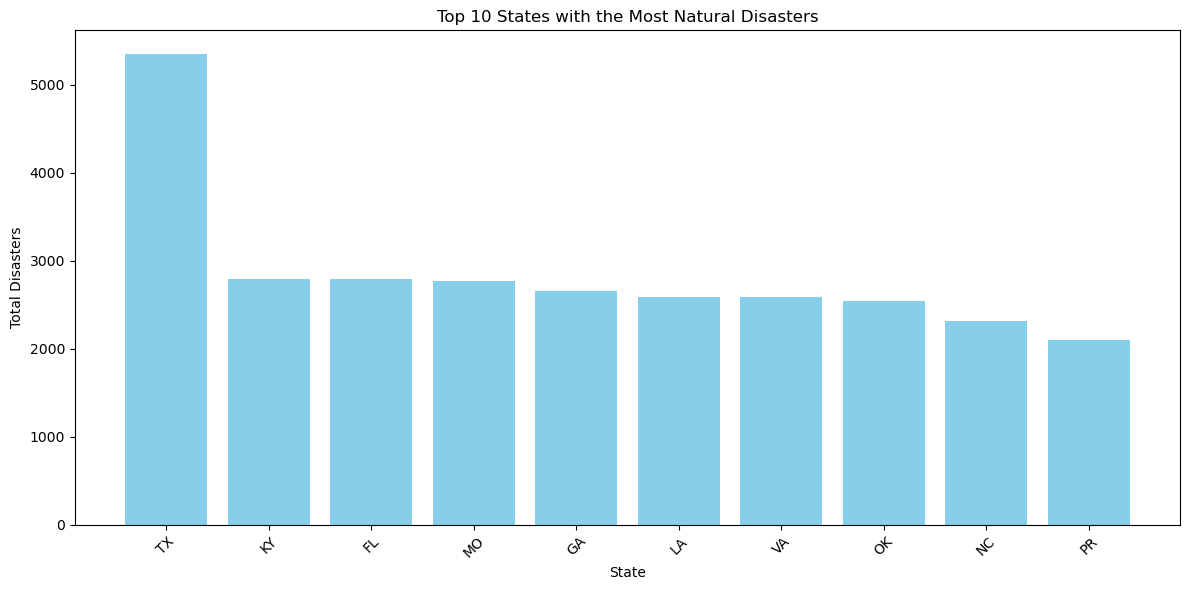

In [18]:
top_states = disaster_by_state.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_states['state'], top_states['total_disasters'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Disasters')
plt.title('Top 10 States with the Most Natural Disasters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

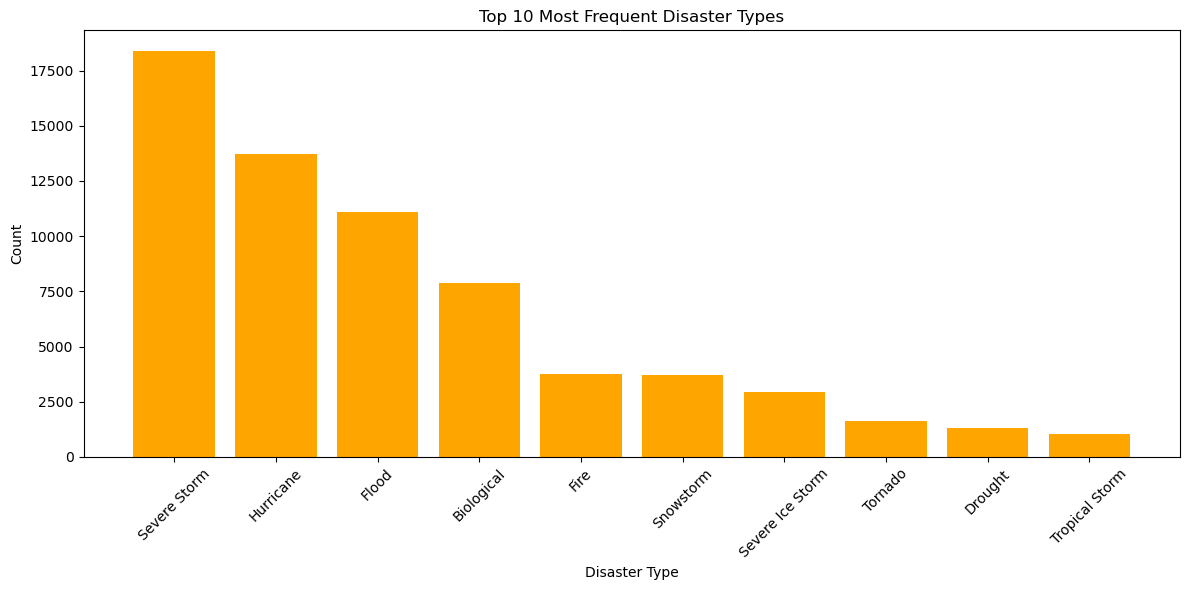

In [19]:
top_disaster_types = disaster_by_type.groupby('incidentType')['count'].sum().reset_index()
top_disaster_types = top_disaster_types.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_disaster_types['incidentType'], top_disaster_types['count'], color='orange')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Disaster Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
most_common_disasters = disaster_by_type.loc[
    disaster_by_type.groupby('state')['count'].idxmax()]
most_common_disasters = most_common_disasters.sort_values(by='count', ascending=False)
most_common_disasters


,state,incidentType,count
185,LA,Hurricane,1450
91,FL,Hurricane,1432
253,MO,Severe Storm,1399
443,TX,Hurricane,1370
282,NC,Hurricane,1304
176,KY,Severe Storm,1156
166,KS,Severe Storm,1095
369,OK,Severe Storm,1041
105,GA,Hurricane,1031
396,PR,Hurricane,1024


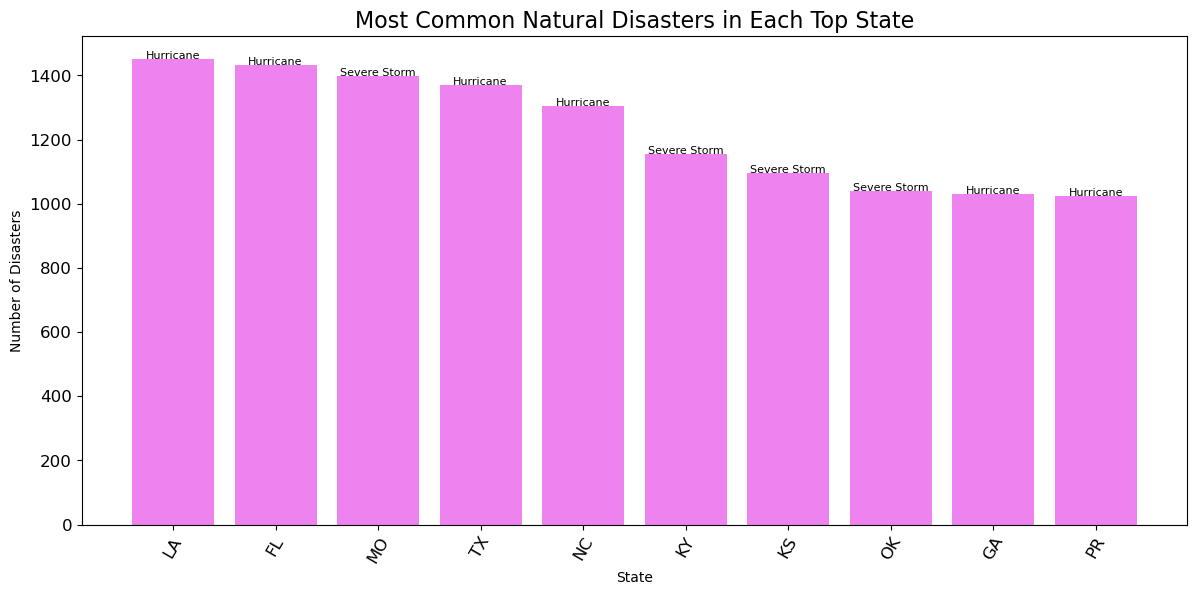

In [25]:
top_states_disasters = most_common_disasters.head(10)
states = top_states_disasters['state']
disasters = top_states_disasters['incidentType']
counts = top_states_disasters['count']

plt.figure(figsize=(12, 6))
plt.bar(states, counts, color='violet')
for i, disaster in enumerate(disasters):
    plt.text(i, counts.iloc[i] + 0.5, disaster, ha='center', fontsize=8)
plt.xlabel('State')
plt.ylabel('Number of Disasters')
plt.title('Most Common Natural Disasters in Each Top State', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Geoapify Geocoding API

In [ ]:
geoapify_base = 'https://api.geoapify.com/v1/geocode/search?'
geoapify_params = {
    'apiKey': api_keys.geoapify_key
    }
